**Build our first neural network in Keras for image classification problem**

We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
keras.backend.backend()

'tensorflow'

In [4]:
fm=keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=fm.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

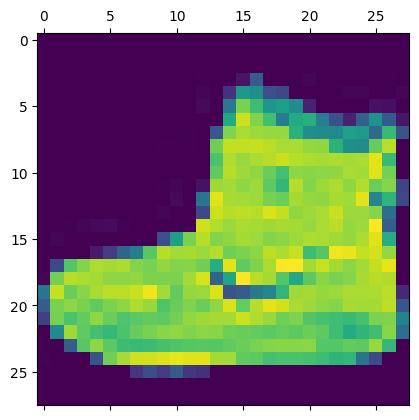

In [9]:
plt.matshow(X_train[0])

**Normalize training data before training the neural net**

In [10]:
X_train=X_train/255

In [11]:
X_test=X_test/255

**Now build the Sequential Model and add layers into it**

In [12]:
from keras.src.activations import softmax
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation

model=Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(100,activation="relu"))
model.add(Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8626


In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8461


[0.4326721727848053, 0.8460999727249146]

**Above shows accuracy score of 82.76%. The first parameter is loss**

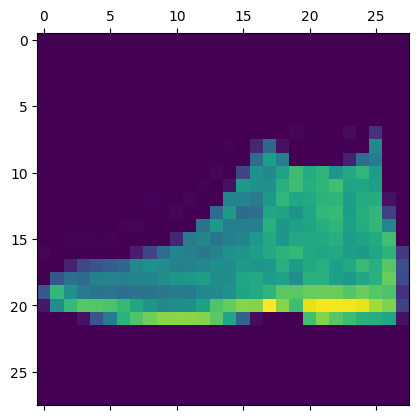

In [23]:
plt.matshow(X_test[0])

In [24]:
yp=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
np.argmax(yp[0])

9

In [28]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]


In [29]:
class_labels[np.argmax(yp[0])]

'Ankle boot'